# Tensorflow CPU vs GPU

Compare the calculation speed of tensorflow CPU with GPU.
It's based on [Introduction to TensorFlow — CPU vs GPU](https://medium.com/@erikhallstrm/hello-world-tensorflow-649b15aed18c)

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
%matplotlib inline

In [2]:
def get_times_matmul(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)

            config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=False)
            with tf.Session(config=config) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes

In [3]:
device_times, matrix_sizes = get_times_matmul(2)
gpu_times1 = device_times["/gpu:0"]
cpu_times1 = device_times["/cpu:0"]

####### Calculating on the /gpu:0 #######
[[ 126.625   123.      115.3125 ...,  118.75    124.9375  127.4375]
 [ 124.      121.375   113.125  ...,  120.25    121.      122.0625]
 [ 132.125   127.      121.625  ...,  125.9375  132.375   131.875 ]
 ..., 
 [ 126.4375  123.6875  116.9375 ...,  119.9375  129.375   128.625 ]
 [ 133.625   127.9375  127.875  ...,  128.125   135.5     136.5   ]
 [ 126.0625  121.375   116.8125 ...,  118.1875  124.25    125.875 ]]
{'/gpu:0': [0.5710327625274658], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
[[ 118.25    126.375   128.625  ...,  124.625   123.3125  129.    ]
 [ 112.1875  120.6875  122.125  ...,  115.375   117.6875  121.625 ]
 [ 116.4375  123.625   123.     ...,  123.5625  118.6875  126.5625]
 ..., 
 [ 116.875   127.      124.75   ...,  122.5     123.75    129.25  ]
 [ 122.875   134.625   131.     ...,  123.      123.4375  130.25  ]
 [ 113.25    125.875   119.9375 ...,  117.75    116.625   125.75  ]]
{'/gpu:0': [0.5710327625274658], '/cp

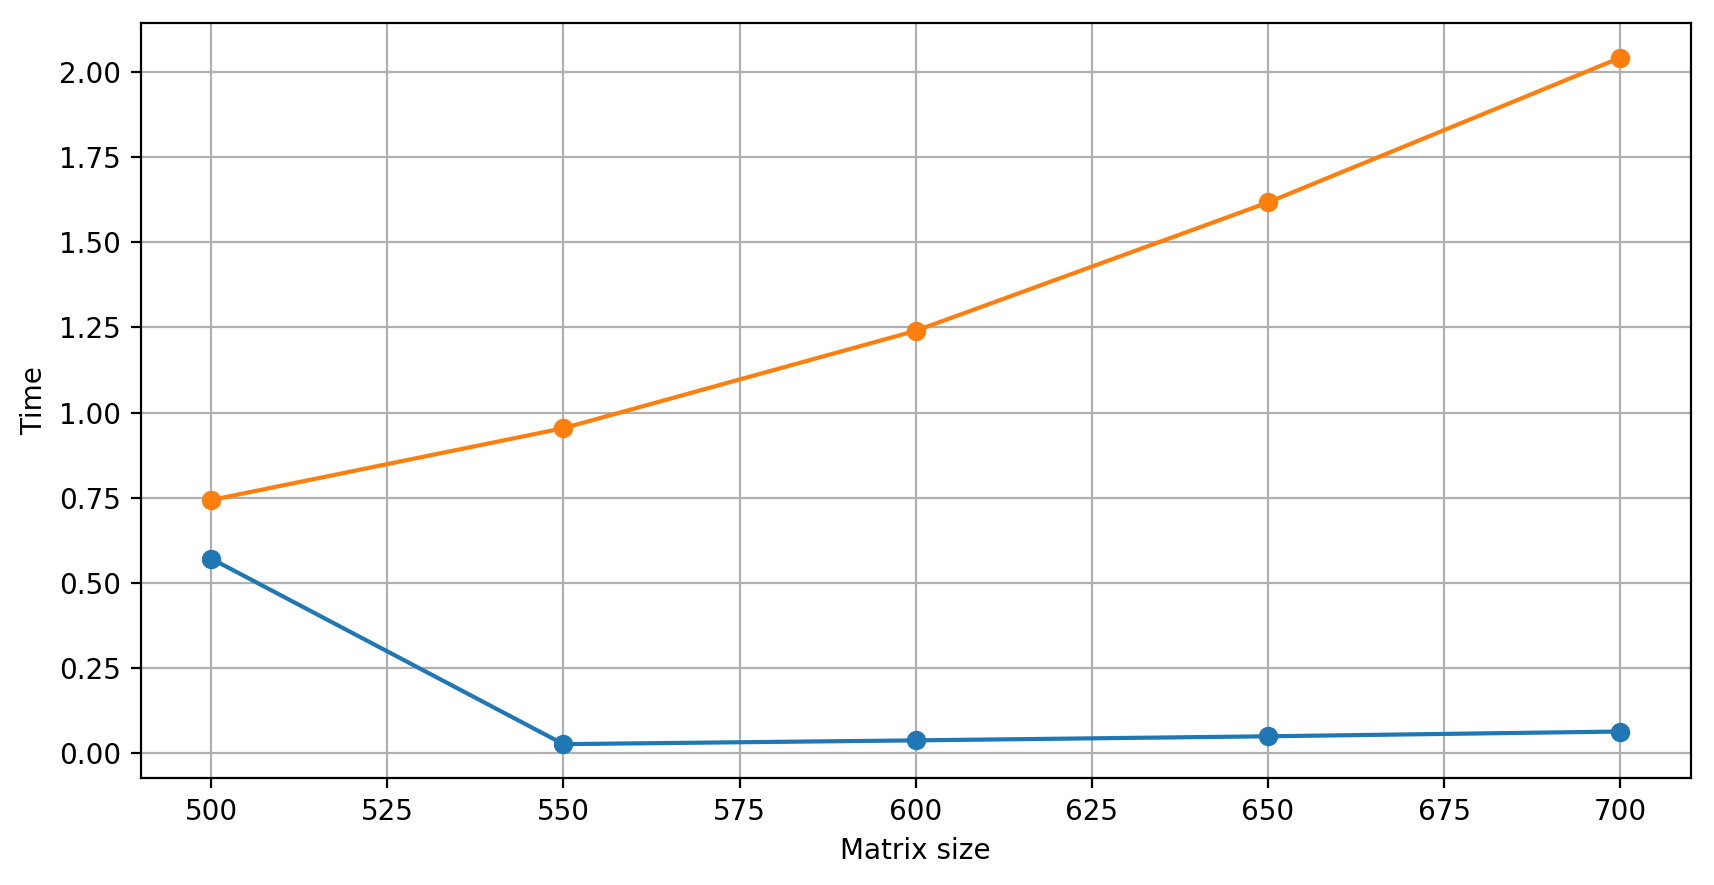

In [4]:
plt.figure(figsize=(10,5),dpi=200)
plt.grid()
plt.plot(matrix_sizes[:len(gpu_times1)], gpu_times1, 'o-')
plt.plot(matrix_sizes[:len(cpu_times1)], cpu_times1, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [5]:
def get_times_multiply(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,50000,1000)

    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = r2 * r1

            config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=False)
            with tf.Session(config=config) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes

In [6]:
device_times, matrix_sizes = get_times_multiply(1)
gpu_times2 = device_times["/gpu:0"]
cpu_times2 = device_times["/cpu:0"]

####### Calculating on the /gpu:0 #######
[[  9.11132812e-01   1.89208984e-01   7.35351562e-01 ...,   1.43966675e-02
    1.24206543e-01   5.79223633e-02]
 [  1.62231445e-01   5.53894043e-03   4.06250000e-01 ...,   1.81274414e-01
    4.80041504e-02   5.84472656e-01]
 [  4.02343750e-01   4.57763672e-02   1.14257812e-01 ...,   5.16052246e-02
    1.09672546e-04   3.09814453e-01]
 ..., 
 [  7.10937500e-01   2.85156250e-01   4.89990234e-01 ...,   7.36694336e-02
    1.72851562e-01   2.72216797e-01]
 [  3.11279297e-01   1.16333008e-01   2.20581055e-01 ...,   2.87780762e-02
    4.50683594e-01   4.74609375e-01]
 [  1.57348633e-01   4.21752930e-02   1.96456909e-03 ...,   1.89086914e-01
    9.13696289e-02   5.31738281e-01]]
{'/gpu:0': [0.06500387191772461], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
[[  4.64111328e-01   3.81774902e-02   2.78472900e-02 ...,   2.93212891e-01
    3.17626953e-01   1.24267578e-01]
 [  4.98962402e-03   1.00036621e-01   2.92663574e-02 ...,   6.42578125e-01
 

[[ 0.13134766  0.23425293  0.23327637 ...,  0.00627136  0.58300781
   0.82617188]
 [ 0.11169434  0.03240967  0.20507812 ...,  0.01125336  0.86523438
   0.37524414]
 [ 0.41113281  0.15112305  0.00547028 ...,  0.18444824  0.27172852
   0.1940918 ]
 ..., 
 [ 0.19091797  0.59130859  0.32080078 ...,  0.05670166  0.          0.36328125]
 [ 0.02206421  0.35961914  0.734375   ...,  0.35180664  0.32543945
   0.25561523]
 [ 0.30859375  0.1730957   0.00463867 ...,  0.56835938  0.09204102
   0.08666992]]
{'/gpu:0': [0.06500387191772461, 0.08400487899780273, 0.10900616645812988, 0.13100743293762207, 0.16900944709777832, 0.18301033973693848], '/cpu:0': [0.08400487899780273, 0.1500086784362793, 0.3130178451538086, 0.5360307693481445, 0.8190467357635498, 1.1320643424987793]}


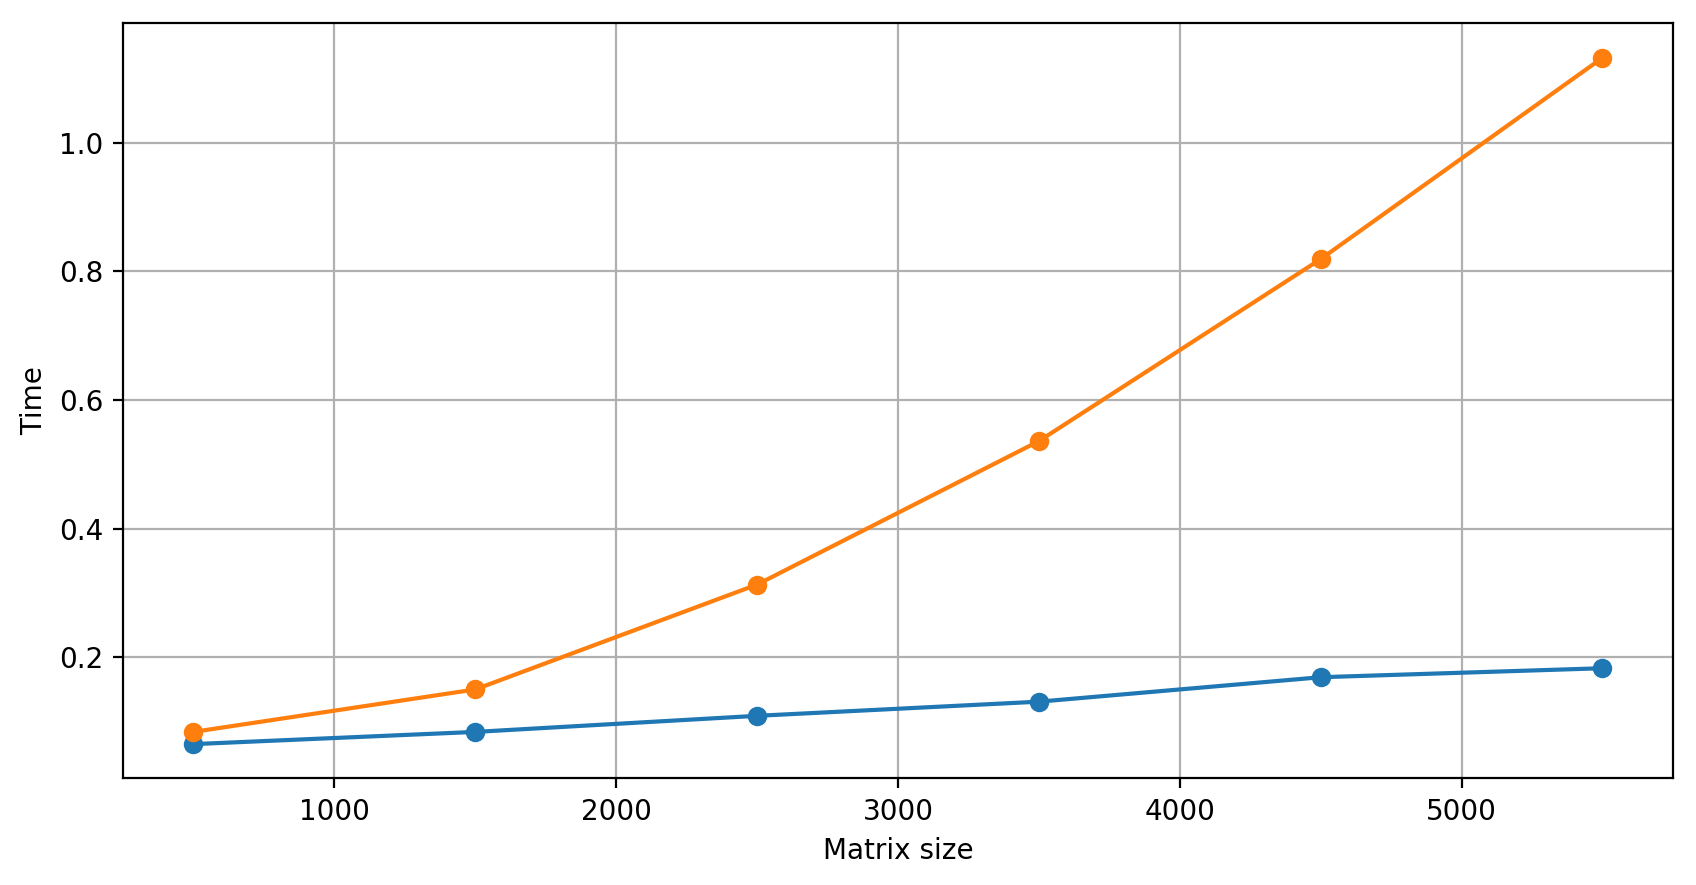

In [7]:
plt.figure(figsize=(10,5),dpi=200)
plt.grid()
plt.plot(matrix_sizes[:len(gpu_times2)], gpu_times2, 'o-')
plt.plot(matrix_sizes[:len(cpu_times2)], cpu_times2, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [8]:
def get_times_matmul_gpu_only(maximum_time):

    device_times = {
        "/gpu:0":[]
    }
    matrix_sizes = range(500,50000,500)

    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)

            config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=False)
            with tf.Session(config=config) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes

In [9]:
device_times, matrix_sizes = get_times_matmul_gpu_only(1.5)
gpu_times3 = device_times["/gpu:0"]

####### Calculating on the /gpu:0 #######
[[ 131.      134.25    129.625  ...,  131.875   128.      127.375 ]
 [ 120.75    125.5     123.125  ...,  118.8125  119.      122.3125]
 [ 128.375   136.5     126.1875 ...,  127.75    125.0625  124.4375]
 ..., 
 [ 124.1875  126.9375  119.1875 ...,  123.25    119.125   121.5625]
 [ 133.125   134.75    130.5    ...,  133.75    124.75    126.6875]
 [ 128.25    129.25    123.375  ...,  126.5     123.4375  123.75  ]]
{'/gpu:0': [0.13000726699829102]}
####### Calculating on the /gpu:0 #######
[[ 256.     258.     246.625 ...,  252.875  245.875  251.75 ]
 [ 251.875  252.125  244.    ...,  254.75   241.875  242.625]
 [ 252.625  249.25   239.125 ...,  244.25   242.625  238.75 ]
 ..., 
 [ 257.25   256.25   245.375 ...,  258.5    248.25   250.   ]
 [ 256.25   254.125  250.375 ...,  253.625  242.625  253.625]
 [ 254.25   257.75   249.625 ...,  254.5    250.375  248.375]]
{'/gpu:0': [0.13000726699829102, 0.15100836753845215]}
####### Calculating on the /gpu

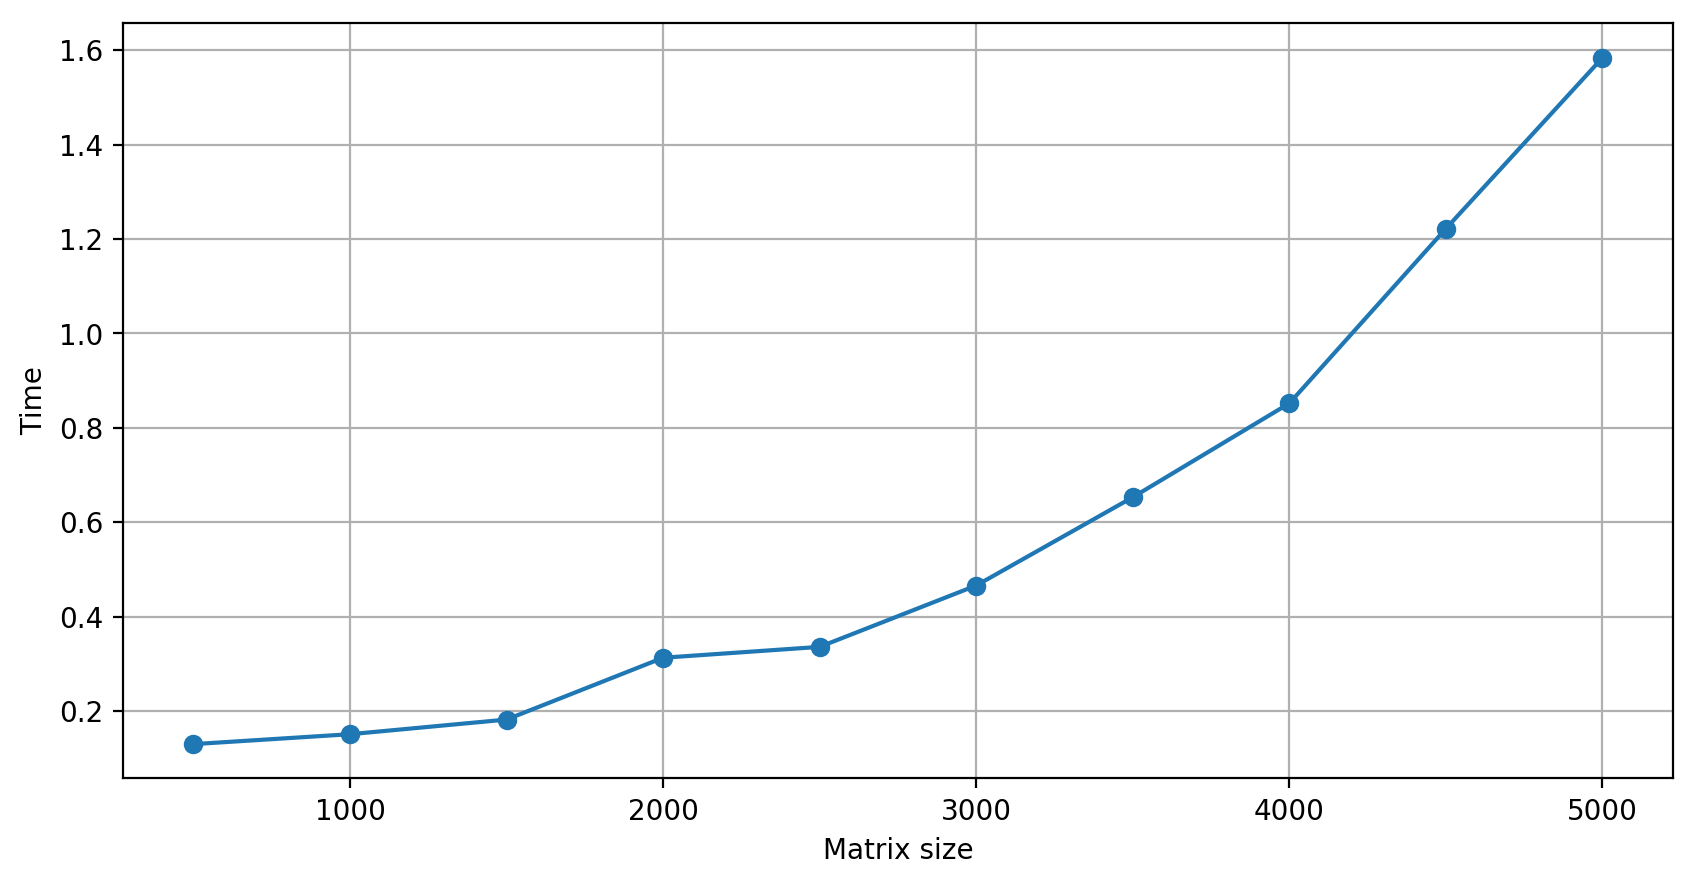

In [10]:
plt.figure(figsize=(10,5),dpi=200)
plt.grid()
plt.plot(matrix_sizes[:len(gpu_times3)], gpu_times3, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()